## USD-6 (Maseda 2014)

There were some issues with the value of 4363, so the best is to mesure fluxes again

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
from astropy.io import fits
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
data = fits.open('tables_from_papers/XS_SRE2_719856_2012-08-27T07_55_31.865_S0.9x11JH_NIR_NOD.fits')# Slit 
header = data[0].header
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                18455 / length of data axis 1                          
NAXIS2  =                   59 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2014-04-03T16:25:03' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
LAMNLIN =                 1311 / No. of lines used in wavelength solution       
LAMRMS  =  0.00994838954166251 / RMS of wavelength solution [CUNIT1]            
CRDER1  = 0.000274758689594615 / Wavelength uncertainty [CUNIT1]                
CSYER1  =                0.0

In [3]:
im = data[0].data
im.shape

wave = np.arange(header['CRVAL1'],header['CRVAL1']+header['NAXIS1']*header['CDELT1'],header['CDELT1']) * 10 # to go from nm to A

<IPython.core.display.Javascript object>


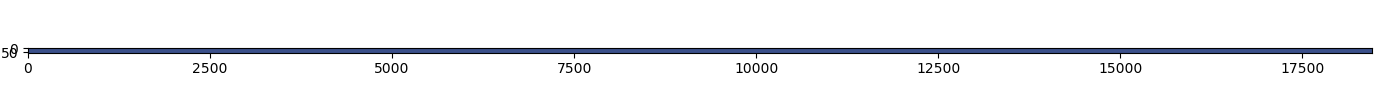

In [4]:
fig, ax = plt.subplots(1,1,figsize=(14,1))
fig.subplots_adjust(left=0.02,right=0.98)
ax.imshow(im)

<IPython.core.display.Javascript object>


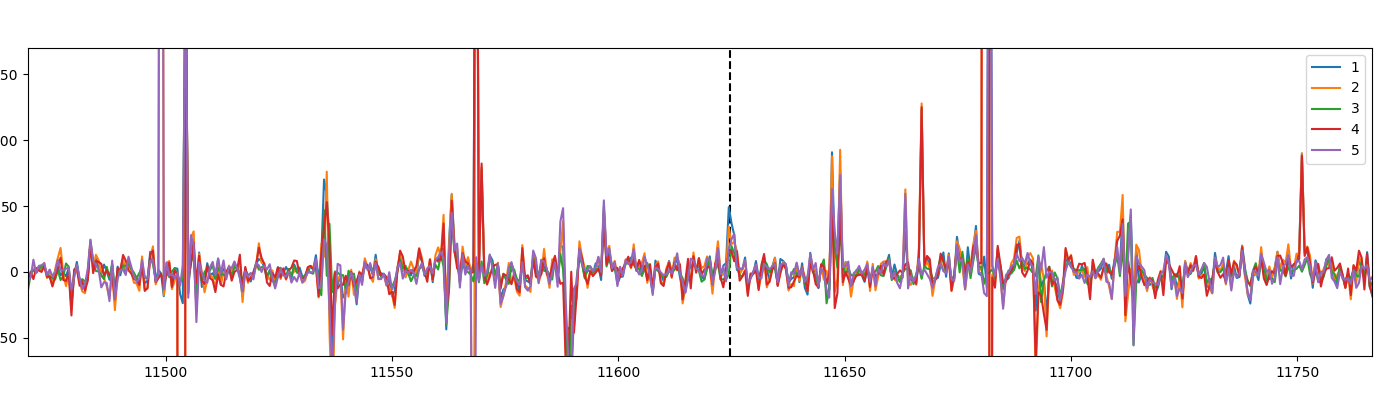

(10000, 20500)

In [5]:
fig, ax = plt.subplots(1,1,figsize=(14,4))
fig.subplots_adjust(left=0.02,right=0.98)

plt.axvline(5008.24*(1+1.6635),color='k',linestyle='--')
plt.axvline(4364.44*(1+1.6635),color='k',linestyle='--')

sp = im[48:52,:].sum(axis=0)
plt.plot(wave,sp,label='1')

sp = im[47:53,:].sum(axis=0)
plt.plot(wave,sp,label='2')

sp = im[49:51,:].sum(axis=0)
plt.plot(wave,sp,label='3')

sp = im[49:53,:].sum(axis=0)
plt.plot(wave,sp,label='4')

sp = im[47:51,:].sum(axis=0)
plt.plot(wave,sp,label='5')

plt.legend()
ax.set_ylim((-1e2,5e2))
ax.set_xlim((10000,20500))

In [7]:
## Write spectra in rest frame and angstrom
from astropy import wcs

sp = im[47:53,:].sum(axis=0)

# Create a new WCS object.
w = wcs.WCS(naxis=1)
w.wcs.crpix = [header['CRPIX1']]
w.wcs.cdelt = [wave[1]-wave[0]]
w.wcs.crval = [wave[0]]
w.wcs.ctype = ['angstrom']
h = w.to_header()

hdu = fits.PrimaryHDU(data=sp,header=h)
hdu.writeto('USD-6.fits',overwrite=True)

## Fit with ALFA
https://www.nebulousresearch.org/codes/alfa/manual

['  O II      ' '  Ne II     ' '  Ne II     ' '  He I      ' '  N III     '
 '  O II      ' '  O II      ' '  N III     ' '  [Ne IV]   ' '  He I      '
 '  [Cl III]  ' '  N II      ' '  N II      ' '  He II     ' '  [O I]     '
 '  He II     ' '  He I      ' '  He I      ' '  He I      ' '  [Cl IV]   '
 '  He II     ']


<IPython.core.display.Javascript object>


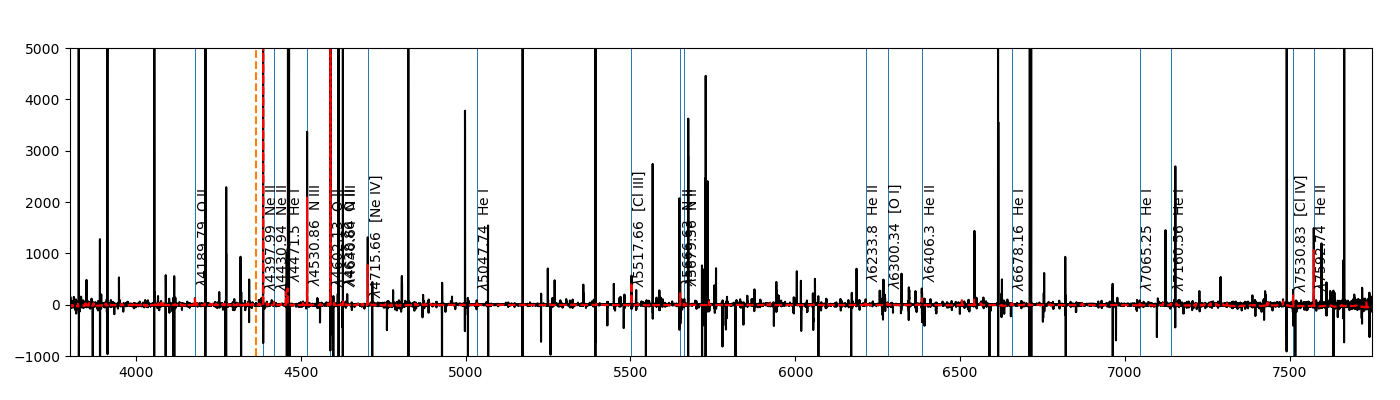

(3800, 7749)

In [41]:
w, sp, fit = np.loadtxt('USD-6.fits_fit',unpack=True, usecols=(0,1,2))

w_obs,w_rest = np.genfromtxt('USD-6.fits_lines.tex',skip_header=3,skip_footer=4,delimiter="&",usecols=(0,1),unpack=True)
emission_name = np.genfromtxt('USD-6.fits_lines.tex',skip_header=3,skip_footer=4,delimiter="&",usecols=(6),unpack=True,dtype="|S20")

print(emission_name)

fig, ax = plt.subplots(1,1,figsize=(14,4))
fig.subplots_adjust(left=0.05,right=0.98)

for i,f,n in zip(w_obs,w_rest,emission_name):
    plt.axvline(i,color='C0',linewidth=0.7)
    plt.annotate('$\lambda$'+str(f)+n,xy=(i+2,2500),rotation=90)

plt.axvline(4364.44,color='C1',linestyle='--')


plt.plot(w,sp,color='k')
plt.plot(w,fit,color='r',linestyle='--')
ax.set_ylim(-1000,5000)
ax.set_xlim(3800,7749)